C:\Users\prano\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2415.3379 - val_loss: 1266.9807
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 663.1433 - val_loss: 46.7759
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.3121 - val_loss: 18.4102
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.0850 - val_loss: 12.7613
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.2211 - val_loss: 9.3206
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9040 - val_loss: 6.8020
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7601 - val_loss: 4.8807
Epoch 8/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8043 - val_loss: 3.5376
Epoch 9/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5140 - val_loss: 2.4764
Epoch 10/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4838 - val_loss: 1.7630
Epoch 11/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5710 - val_loss: 1.2489
Epoch 12/100
179/179 ━━━━━━

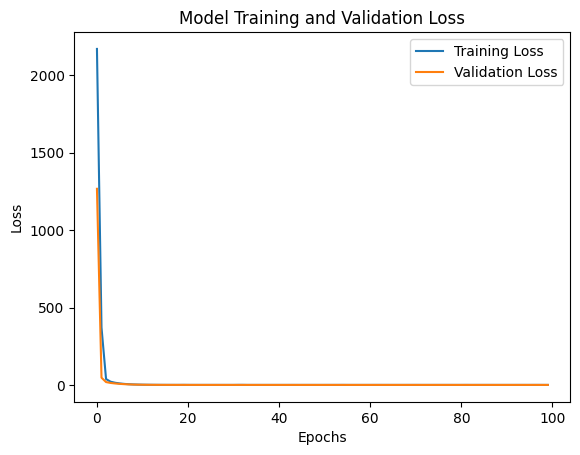

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv('C:/Users/prano/Downloads/Albatros_XII.csv')  # Replace with the actual path to your dataset

# Drop rows with missing or invalid values in 'SOC' and other important columns
data.dropna(subset=['SOC', 'Pack Vol.', 'DCL', 'Pack Temp', 'Motor temp', 'Controller temp'], inplace=True)

# Preprocess the data
features = ['SOC', 'Pack Vol.', 'DCL', 'Pack Temp', 'Motor temp', 'Controller temp']

# Create a proxy target for remaining battery life (estimate based on SOC or related variables)
# Here, we assume that a lower SOC indicates the battery is closer to the end of its life.
# You can adjust this proxy target according to the specific behavior of your dataset.
data['Estimated_Remaining_Life'] = 100 - data['SOC']  # Simplified assumption: 100% SOC = 0 Remaining Life, 0% SOC = Full Life Used

# Clip extreme values in 'Estimated_Remaining_Life' for sanity check
data['Estimated_Remaining_Life'] = np.clip(data['Estimated_Remaining_Life'], 0, 100)

# Splitting the dataset into features (X) and target (y)
X = data[features]
y = data['Estimated_Remaining_Life']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()

# Input layer with 32 neurons and ReLU activation
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output layer (1 neuron for predicting the continuous remaining life)
model.add(Dense(1))

# Compile the model using mean squared error as the loss function and Adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Implement Early Stopping to prevent overfitting and stop training when no improvement is seen
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model performance on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the first few predicted and actual values for comparison
print("Predicted Remaining Life (first 5):", y_pred[:5].flatten())
print("Actual Remaining Life (first 5):", y_test[:5].values)

# Optional: Plot training history to visualize training process
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/100


C:\Users\prano\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 315.6281 - val_loss: 64.8755
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.3678 - val_loss: 4.1371
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6373 - val_loss: 1.7401
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6307 - val_loss: 0.8129
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7197 - val_loss: 0.4657
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4431 - val_loss: 0.2923
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.2569 - val_loss: 0.1894
Epoch 8/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1909 - val_loss: 0.1299
Epoch 9/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1161 - val_loss: 0.0924
Epoch 10/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0846 - val_loss: 0.0665
Epoch 11/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0654 - val_loss: 0.0508
Epoch 12/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

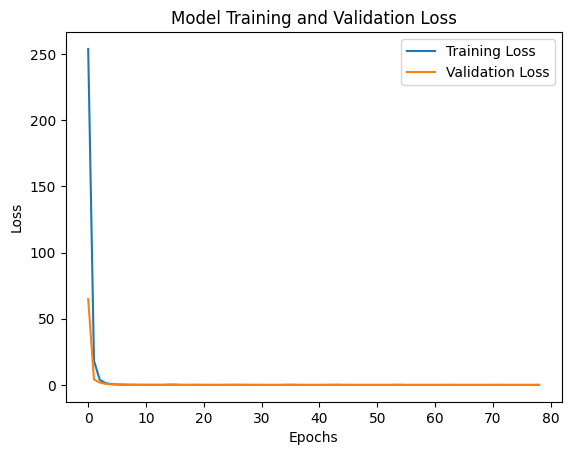

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/prano/Downloads/Albatros_XII.csv')  # Replace with the actual path to your dataset

# Drop rows with missing or invalid values in 'SOC' and other important columns
data.dropna(subset=['SOC', 'Pack Vol.', 'DCL', 'Pack Temp', 'Motor temp', 'Controller temp'], inplace=True)

# Preprocess the data
features = ['SOC', 'Pack Vol.', 'DCL', 'Pack Temp', 'Motor temp', 'Controller temp']

# Assume the total expected battery life is 36 months (this can vary based on your system)
total_battery_life_months = 36  # You can adjust this based on real-world data

# Create proxy target: Remaining life in terms of months
data['Estimated_Remaining_Life_Months'] = (100 - data['SOC']) / 100 * total_battery_life_months

# Clip extreme values in 'Estimated_Remaining_Life_Months' for sanity check
data['Estimated_Remaining_Life_Months'] = np.clip(data['Estimated_Remaining_Life_Months'], 0, total_battery_life_months)

# Splitting the dataset into features (X) and target (y)
X = data[features]
y = data['Estimated_Remaining_Life_Months']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()

# Input layer with 32 neurons and ReLU activation
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output layer (1 neuron for predicting the continuous remaining life in months)
model.add(Dense(1))

# Compile the model using mean squared error as the loss function and Adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Implement Early Stopping to prevent overfitting and stop training when no improvement is seen
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model performance on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the first few predicted remaining life values in months for comparison
print("Predicted Remaining Life (in months, first 5):", y_pred[:5].flatten())
print("Actual Remaining Life (in months, first 5):", y_test[:5].values)

# Optional: Plot training history to visualize training process
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/100


C:\Users\prano\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2362.7883 - val_loss: 611.1504
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 241.8785 - val_loss: 23.1309
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 21.8636 - val_loss: 11.6546
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.2383 - val_loss: 7.1159
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.7361 - val_loss: 4.4944
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.1937 - val_loss: 3.0260
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6470 - val_loss: 2.0805
Epoch 8/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9432 - val_loss: 1.3526
Epoch 9/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1815 - val_loss: 0.9017
Epoch 10/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8546 - val_loss: 0.6242
Epoch 11/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6348 - val_loss: 0.4495
Epoch 12/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 

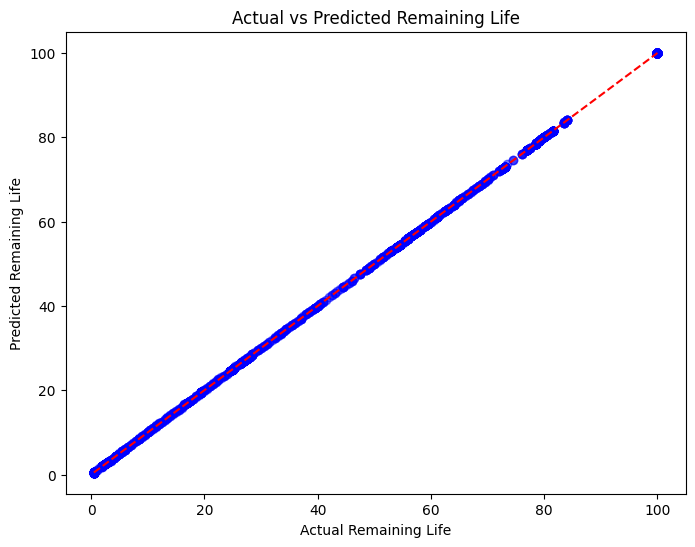

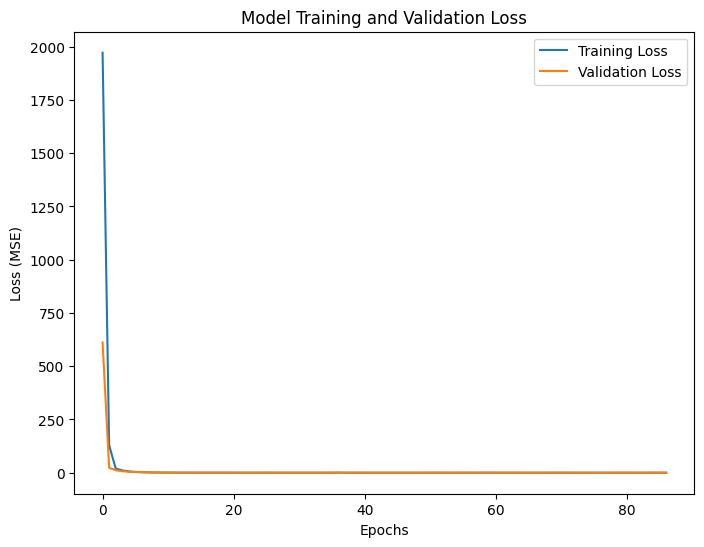

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/prano/Downloads/Albatros_XII.csv')  # Replace with the actual path to your dataset

# Drop rows with missing or invalid values in 'SOC' and other important columns
data.dropna(subset=['SOC', 'Pack Vol.', 'DCL', 'Pack Temp', 'Motor temp', 'Controller temp'], inplace=True)

# Preprocess the data
features = ['SOC', 'Pack Vol.', 'DCL', 'Pack Temp', 'Motor temp', 'Controller temp']

# Create a proxy target for remaining battery life (estimate based on SOC or related variables)
# Here, we assume that a lower SOC indicates the battery is closer to the end of its life.
data['Estimated_Remaining_Life'] = 100 - data['SOC']  # Simplified assumption

# Clip extreme values in 'Estimated_Remaining_Life' for sanity check
data['Estimated_Remaining_Life'] = np.clip(data['Estimated_Remaining_Life'], 0, 100)

# Splitting the dataset into features (X) and target (y)
X = data[features]
y = data['Estimated_Remaining_Life']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()

# Input layer with 32 neurons and ReLU activation
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output layer (1 neuron for predicting the continuous remaining life)
model.add(Dense(1))

# Compile the model using mean squared error as the loss function and Adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Implement Early Stopping to prevent overfitting and stop training when no improvement is seen
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model performance on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Print the first few predicted and actual values for comparison
print("Predicted Remaining Life (first 5):", y_pred[:5].flatten())
print("Actual Remaining Life (first 5):", y_test[:5].values)

# Optional: Plot actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of equality
plt.xlabel('Actual Remaining Life')
plt.ylabel('Predicted Remaining Life')
plt.title('Actual vs Predicted Remaining Life')
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Model Training and Validation Loss')
plt.show()




Epoch 1/100


C:\Users\prano\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2483.2854 - val_loss: 979.8016
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 415.1809 - val_loss: 26.0102
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 28.7016 - val_loss: 8.5811
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10.0947 - val_loss: 3.9163
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.3745 - val_loss: 2.3408
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2396 - val_loss: 1.6865
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8039 - val_loss: 1.3059
Epoch 8/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0603 - val_loss: 1.0711
Epoch 9/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9822 - val_loss: 0.8858
Epoch 10/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7469 - val_loss: 0.7151
Epoch 11/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6701 - val_loss: 0.5844
Epoch 12/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1

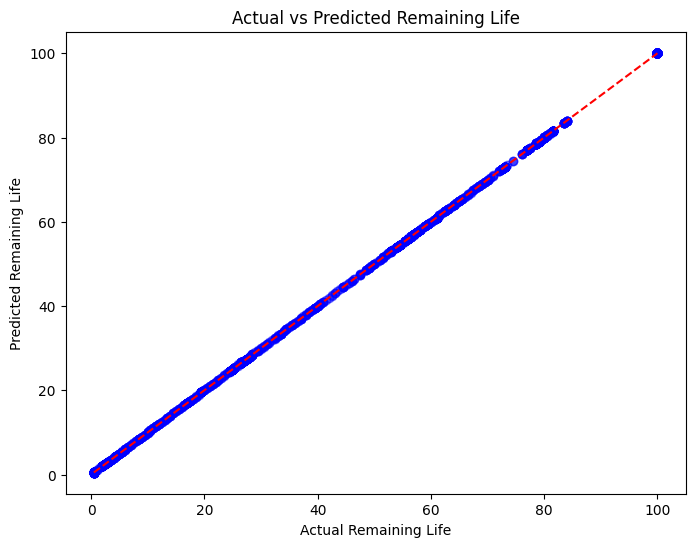

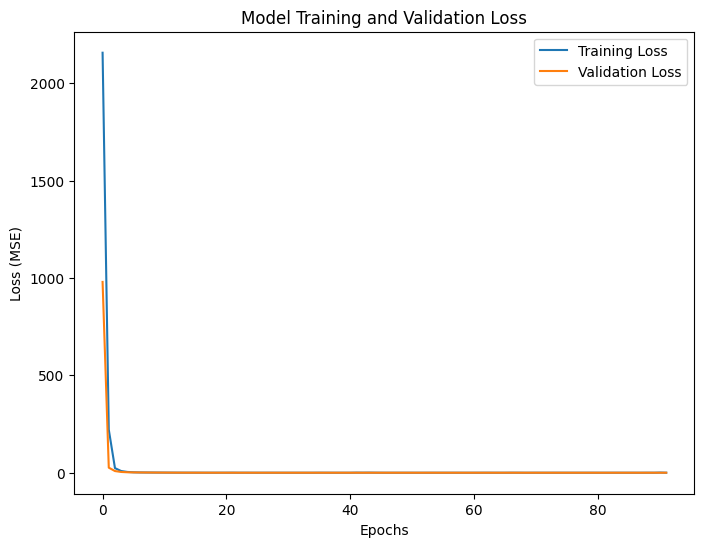

Enter the following battery parameters to predict remaining life:


State of Charge (SOC):  98.5
Pack Voltage (Pack Vol.):  58.5
DCL:  176
Pack Temperature (Pack Temp):  36
Motor Temperature (Motor temp):  0
Controller Temperature (Controller temp):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Remaining Battery Life: 1.42 months


C:\Users\prano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/prano/Downloads/Albatros_XII.csv')  # Replace with the actual path to your dataset

# Drop rows with missing or invalid values in 'SOC' and other important columns
data.dropna(subset=['SOC', 'Pack Vol.', 'DCL', 'Pack Temp', 'Motor temp', 'Controller temp'], inplace=True)

# Preprocess the data
features = ['SOC', 'Pack Vol.', 'DCL', 'Pack Temp', 'Motor temp', 'Controller temp']

# Create a proxy target for remaining battery life (estimate based on SOC or related variables)
data['Estimated_Remaining_Life'] = 100 - data['SOC']  # Simplified assumption

# Clip extreme values in 'Estimated_Remaining_Life' for sanity check
data['Estimated_Remaining_Life'] = np.clip(data['Estimated_Remaining_Life'], 0, 100)

# Splitting the dataset into features (X) and target (y)
X = data[features]
y = data['Estimated_Remaining_Life']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()

# Input layer with 32 neurons and ReLU activation
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output layer (1 neuron for predicting the continuous remaining life)
model.add(Dense(1))

# Compile the model using mean squared error as the loss function and Adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Implement Early Stopping to prevent overfitting and stop training when no improvement is seen
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model performance on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Clip predictions to be within the maximum battery life
y_pred = np.clip(y_pred, 0, 100)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Print the first few predicted and actual values for comparison
print("Predicted Remaining Life (first 5):", y_pred[:5].flatten())
print("Actual Remaining Life (first 5):", y_test[:5].values)

# Optional: Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of equality
plt.xlabel('Actual Remaining Life')
plt.ylabel('Predicted Remaining Life')
plt.title('Actual vs Predicted Remaining Life')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Model Training and Validation Loss')
plt.show()

# Function to take user input and predict remaining battery life
def predict_remaining_life():
    print("Enter the following battery parameters to predict remaining life:")
    soc = float(input("State of Charge (SOC): "))
    pack_vol = float(input("Pack Voltage (Pack Vol.): "))
    dcl = float(input("DCL: "))
    pack_temp = float(input("Pack Temperature (Pack Temp): "))
    motor_temp = float(input("Motor Temperature (Motor temp): "))
    controller_temp = float(input("Controller Temperature (Controller temp): "))

    # Prepare the input data
    input_data = np.array([[soc, pack_vol, dcl, pack_temp, motor_temp, controller_temp]])

    # Standardize the input data
    input_data_scaled = scaler.transform(input_data)

    # Make prediction
    predicted_life = model.predict(input_data_scaled)

    # Clip predicted life to a valid range
    predicted_life = np.clip(predicted_life, 0, 100)

    # Output the predicted remaining life
    print(f"Predicted Remaining Battery Life: {predicted_life[0][0]:.2f} months")

# Call the prediction function
predict_remaining_life()


Columns in the dataset: Index(['Time', 'Micros(LV box/RPM)', 'LV box file Status', 'LV box File No.',
       'Vali. Micros', 'Vali. F status', 'Vali. F no', 'SOC', 'Pack Vol.',
       'DCL', 'Pack Temp', 'Motor temp', 'Controller temp', 'Failsafe',
       'DTC 1', 'DTC 2', 'State', 'Latitude', 'Longitude', 'Speed'],
      dtype='object')
Max Estimated Remaining Life: 35.82
Min Estimated Remaining Life: 0.0


C:\Users\prano\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 427.1094 - val_loss: 12.3121
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 14.5178 - val_loss: 5.1116
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.8451 - val_loss: 2.3986
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0797 - val_loss: 1.2179
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4537 - val_loss: 0.6820
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6563 - val_loss: 0.4347
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3804 - val_loss: 0.2870
Epoch 8/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2489 - val_loss: 0.2031
Epoch 9/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1801 - val_loss: 0.1510
Epoch 10/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1353 - val_loss: 0.1197
Epoch 11/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1127 - val_loss: 0.0993
Epoch 12/100
179/179 ━━━━━━━━━━━━━━━━

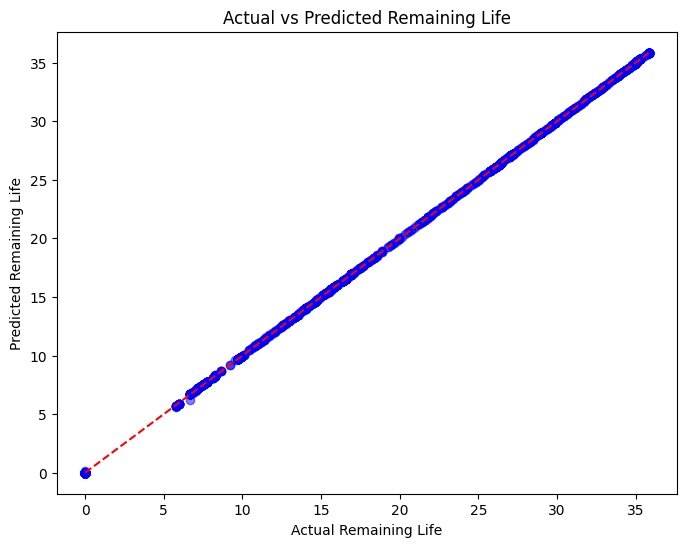

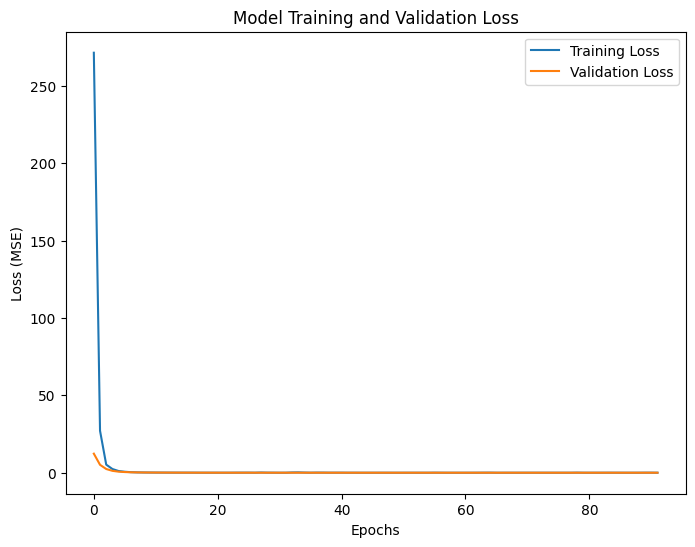

Enter the following battery parameters to predict remaining life:


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/prano/Downloads/Albatros_XII.csv')  # Replace with the actual path to your dataset

# Check the column names
print("Columns in the dataset:", data.columns)

# Drop rows with missing or invalid values in 'SOC' and other important columns
data.dropna(subset=['SOC', 'Pack Vol.', 'DCL', 'Pack Temp', 'Motor temp', 'Controller temp'], inplace=True)

# Preprocess the data
features = ['SOC', 'Pack Vol.', 'DCL', 'Pack Temp', 'Motor temp', 'Controller temp']

# Calculate Estimated Remaining Life based on SOC and a max life of 36 months
max_battery_life = 36  # months
data['Estimated_Remaining_Life'] = max_battery_life * (data['SOC'] / 100)  # Scale SOC to max life

# Check maximum and minimum values in the remaining life to understand the distribution
print(f"Max Estimated Remaining Life: {data['Estimated_Remaining_Life'].max()}")
print(f"Min Estimated Remaining Life: {data['Estimated_Remaining_Life'].min()}")

# Splitting the dataset into features (X) and target (y)
X = data[features]
y = data['Estimated_Remaining_Life']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()

# Input layer with 32 neurons and ReLU activation
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output layer (1 neuron for predicting the continuous remaining life)
model.add(Dense(1, activation='relu')) 

# Compile the model using mean squared error as the loss function and Adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Implement Early Stopping to prevent overfitting and stop training when no improvement is seen
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model performance on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Print the first few predicted and actual values for comparison
print("Predicted Remaining Life (first 5):", y_pred[:5].flatten())
print("Actual Remaining Life (first 5):", y_test[:5].values)

# Optional: Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of equality
plt.xlabel('Actual Remaining Life')
plt.ylabel('Predicted Remaining Life')
plt.title('Actual vs Predicted Remaining Life')
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Model Training and Validation Loss')
plt.show()

# Function to take user input and predict remaining battery life
def predict_remaining_life():
    print("Enter the following battery parameters to predict remaining life:")
    soc = float(input("State of Charge (SOC): "))
    pack_vol = float(input("Pack Voltage (Pack Vol.): "))
    dcl = float(input("DCL: "))
    pack_temp = float(input("Pack Temperature (Pack Temp): "))
    motor_temp = float(input("Motor Temperature (Motor temp): "))
    controller_temp = float(input("Controller Temperature (Controller temp): "))

    # Prepare the input data
    input_data = np.array([[soc, pack_vol, dcl, pack_temp, motor_temp, controller_temp]])

    # Standardize the input data
    input_data_scaled = scaler.transform(input_data)

    # Make prediction
    predicted_life = model.predict(input_data_scaled)

    # Output the predicted remaining life
    print(f"Predicted Remaining Battery Life: {predicted_life[0][0]:.2f} months")

# Call the prediction function
predict_remaining_life()



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/prano/Downloads/Albatros_XII.csv')  # Replace with the actual path to your dataset

# Check the column names
print("Columns in the dataset:", data.columns)

# Drop rows with missing or invalid values in 'SOC' and other important columns
data.dropna(subset=['SOC', 'Pack Vol.', 'DCL', 'Pack Temp', 'Motor temp', 'Controller temp'], inplace=True)

# Preprocess the data
features = ['SOC', 'Pack Vol.', 'DCL', 'Pack Temp', 'Motor temp', 'Controller temp']

# Calculate Estimated Remaining Life based on SOC and a max life of 36 months
max_battery_life = 36  # months
data['Estimated_Remaining_Life'] = max_battery_life * (data['SOC'] / 100)  # Scale SOC to max life

# Check maximum and minimum values in the remaining life to understand the distribution
print(f"Max Estimated Remaining Life: {data['Estimated_Remaining_Life'].max()}")
print(f"Min Estimated Remaining Life: {data['Estimated_Remaining_Life'].min()}")

# Splitting the dataset into features (X) and target (y)
X = data[features]
y = data['Estimated_Remaining_Life']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()

# Input layer with 32 neurons and ReLU activation
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output layer (1 neuron for predicting the continuous remaining life)
model.add(Dense(1))  # Linear activation is default

# Compile the model using mean squared error as the loss function and Adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Implement Early Stopping to prevent overfitting and stop training when no improvement is seen
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model performance on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Print the first few predicted and actual values for comparison
# Using np.round to display values without scientific notation
print("Predicted Remaining Life (first 5):", np.round(y_pred[:5].flatten(), 2))
print("Actual Remaining Life (first 5):", np.round(y_test[:5].values, 2))

# Optional: Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of equality
plt.xlabel('Actual Remaining Life')
plt.ylabel('Predicted Remaining Life')
plt.title('Actual vs Predicted Remaining Life')
plt.show()



# Function to take user input and predict remaining battery life
def predict_remaining_life():
    print("Enter the following battery parameters to predict remaining life:")
    soc = float(input("State of Charge (SOC): "))
    pack_vol = float(input("Pack Voltage (Pack Vol.): "))
    dcl = float(input("DCL: "))
    pack_temp = float(input("Pack Temperature (Pack Temp): "))
    motor_temp = float(input("Motor Temperature (Motor temp): "))
    controller_temp = float(input("Controller Temperature (Controller temp): "))

    # Prepare the input data
    input_data = np.array([[soc, pack_vol, dcl, pack_temp, motor_temp, controller_temp]])

    # Standardize the input data
    input_data_scaled = scaler.transform(input_data)

    # Make prediction
    predicted_life = model.predict(input_data_scaled)

    # Output the predicted remaining life
    print(f"Predicted Remaining Battery Life: {predicted_life[0][0]:.2f} months")

# Call the prediction function
predict_remaining_life()
